## Linear assumption

### Regression

Linear regression is a straightforward approach for predicting a quantitative response Y on the basis of a different predictor variable X1, X2, ... Xn. It assumes that there is a linear relationship between X(s) and Y. Mathematically, we can write this linear relationship as Y ≈ β0 + β1X1 + β2X2 + ... + βnXn. 

In a very simple example, X may represent number of advertisements shown on TV per day and Y may represent total number of sales of the advertised product per day. Then we can regress sales onto adds shown per day on TV by fitting the model sales ≈ β0 + β1×TV (see figure below).

Text(0.5, 0, 'Number of advertisements per day')

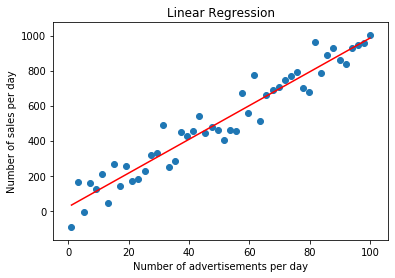

In [1]:
# simulation of a linear regression example

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

n = 50
x = np.linspace(1, 100, n)
y = x * 10 + np.random.randn(n)*80

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
ax.set_title('Linear Regression')
ax.set_ylabel('Number of sales per day')
ax.set_xlabel('Number of advertisements per day')

### Classification

Similarly, for classification, Logistic Regression assumes a linear relationship between the variables and the log of the odds.

Odds = p / 1 - p, where p is the probability of y = 1

log(odds) = β0 + β1X1 + β2X2 + ... + βnXn

In the figure below, I illustrate and explain this relationship.

([<matplotlib.axis.XTick at 0xb614608>,
 <a list of 7 Text xticklabel objects>)

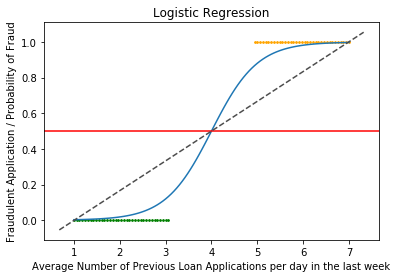

In [3]:
# simulation of a logistic regression linear dependency

X = np.linspace(-6, 6, 100)
Y = 1 / (1 + np.exp(-X))

# log dots
Y_dots0 = np.array(list('0')*35).astype(int)
Y_dots1 = np.array(list('1')*35).astype(int)

#ticks
x = np.array([-6, -4, -2, 0, 2, 4, 6])
my_xticks = [1,2,3,4,5,6,7]

fig, ax = plt.subplots()
plt.plot(X, Y)
ax.scatter(X[0:35], Y_dots0, s=3, color='green')
ax.scatter(X[65:100], Y_dots1, s=3, color='orange')
plt.axhline(y=0.5, xmin=-6, xmax=6, color ='red')
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_title('Logistic Regression')
ax.set_ylabel('Fraudulent Application / Probability of Fraud')
ax.set_xlabel('Average Number of Previous Loan Applications per day in the last week')
plt.xticks(x, my_xticks)

**Figure legend**: we want to predict if a loan application is fraudulent based on the number of previous applications the customer  made to different loan providers per day during the last week (fraudsters tend to make multiple applications to multiple places to maximise their chances of getting a loan). The yellow and green dots indicate fraudulent and non-fraudulent applications. The dotted black line indicates the linear relationship assumed by the Logistic Regression model. The blue line indicates the outcome of the Logistic function, or in other words, the probability of an application being fraudulent. If the probability is higher than 0.5 then the application has a high probability of being fraudulent, whereas if the probability is smaller than 0.5 then it is very likely a genuine application.

## Which algorithms assume linear relationships between predictors and outcome?

Models that assume linear relationships between predictors and outome are:

- Linear and Logistic Regression
- Linear Discriminant Analysis (LDA)
- Principal Component Regressors

## Why is it important to understand the linear assumptions?

If the machine learning model assumes a linear dependency between the predictors Xs and the outcome Y, when there is not such a linear relationship, the model will have a poor performance. In such cases, we are better off trying another machine learning model that does not make such assumption.

**Linear models are preferred in business settings for a variety of reasons**:

- If there is a linear relationship between Xs and Y, linear models can have very good performance
- Non-linear models like trees cannot make accurate predictions on value ranges for the target outside those of the training dataset
- Sometimes, the business wants a linear change between the output and the predictors (this would not occur with non-linear methods)
- Linear models are easier to interpret, and we can infer how each variable affects the output, thus business can comply with regulations (for example regulations to treat the customer fairly).

For more detail on linear relationships refer to the following books:

- An introduction to Statistical Learning (http://www-bcf.usc.edu/~gareth/ISL/ISLR%20First%20Printing.pdf)
- Elements of Statistical Learning (https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

### What can be done if there is no linear relationship?

Sometimes a linear relationship may appear after some variable transformation. Two transformations typically used are:

- Mathematical transformation of the variable
- Discretisation

**I will discuss a lot more on the above transformations in sections 14 and 15**. For now, let's look into the relationship of predictors and outcome in a real life example.

===================================================================================================

## Real Life example: 

### Predicting Sale Price of Houses

The problem at hand aims to predict the final sale price of homes based on different explanatory variables describing aspects of residential homes. Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.

To download the House Price dataset go this website:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset.
Save it to a directory of your choice.

**Note that you need to be logged in to Kaggle in order to download the datasets**.

If you save it in the same directory from which you are running this notebook and name the file 'houseprice.csv' then you can load it the same way I will load it below.

====================================================================================================

In this notebook, I will demonstrate some naturally occurring linear relationships between predictors X and output variables Y.

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [5]:
# load the House Price Dataset, with a few columns for demonstration

cols_to_use = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea','WoodDeckSF',
               'BsmtUnfSF','SalePrice']

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 7)


,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,SalePrice
0,7,150,856,856,1710,0,208500
1,6,284,1262,1262,1262,298,181500
2,7,434,920,920,1786,0,223500
3,7,540,756,961,1717,0,140000
4,8,490,1145,1145,2198,192,250000


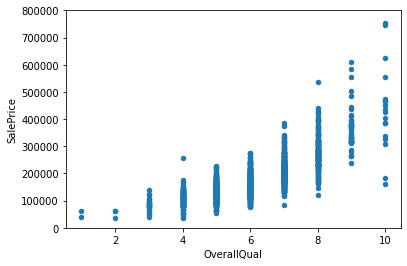

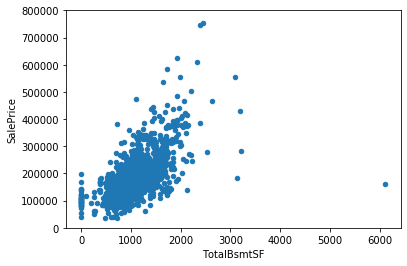

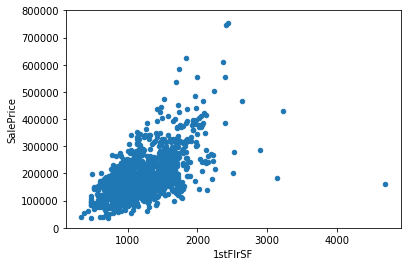

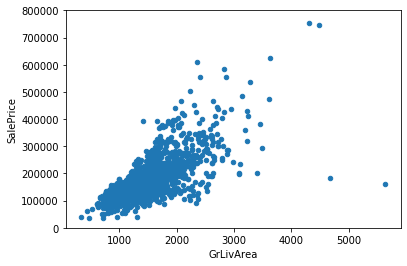

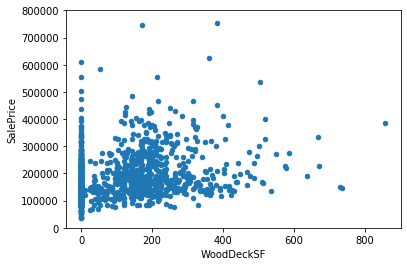

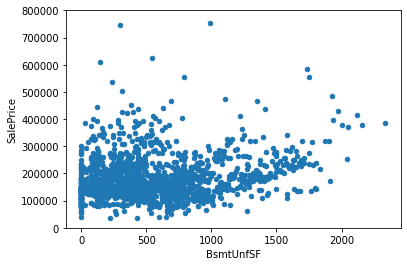

In [6]:
# plot the numerical columns vs the output SalePrice to visualise the (linear) relationship

for col in cols_to_use[:-1]:
    data.plot.scatter(x=col, y='SalePrice', ylim=(0,800000))
    plt.show()

In [7]:
# I will group variables into those that have a somewhat linear relationship with sale price
#  and those that don't

linear_vars = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']
non_linear_vars = ['WoodDeckSF', 'BsmtUnfSF']

In [8]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.fillna(0), data.SalePrice, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 7), (438, 7))

### Assessing linear relationship: examining the errors

One thing that we can do to determine whether there is a linear relationship between the variable and the target is:

1) make a linear regression model using the desired variables (X)

2) predict with the linear model the target

3) determine the error (True sale price - predicted sale price)

4) observe the distribution of the error.

If SalePrice is linearly explained by the variable we are evaluating, then the error should be random noise, typically following a normal distribution centered at 0. So we expect to see the error terms for each observation lying around 0.

#### OverallQual

Train set
Linear Regression mse: 2349097879.2825713
Test set
Linear Regression mse: 2390257968.965772

Error Stats
count       438.000000
mean      -1900.505074
std       48909.175847
min     -197503.771783
25%      -27300.973002
50%       -2136.441159
75%       16082.692310
max      387496.228217
Name: error, dtype: float64


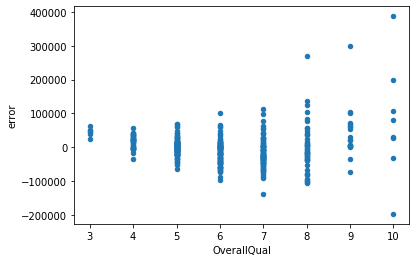

In [9]:
col = 'OverallQual'
linreg = LinearRegression()
linreg.fit(X_train[col].to_frame(), y_train)
print('Train set')
pred = linreg.predict(X_train[col].to_frame())
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set')
pred = linreg.predict(X_test[col].to_frame())
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()
X_test['error'] = X_test.SalePrice - pred
print('Error Stats')
print(X_test['error'].describe())
X_test.plot.scatter(x=col, y='error')

The errors should be normally distributed with a mean around 0. Tthis is not the case forthe variable OverallQual. Thus, we conclude that  'OverallQual' is not linearly related to 'SalePrice'.

#### TotalBsmtSF

Train set
Linear Regression mse: 3715940037.8173113
Test set
Linear Regression mse: 4478167557.081898
Error stats
count       438.000000
mean        288.594287
std       66995.011776
min     -622462.817334
25%      -37885.876660
50%      -11364.807331
75%       36649.455113
max      404776.853066
Name: error, dtype: float64


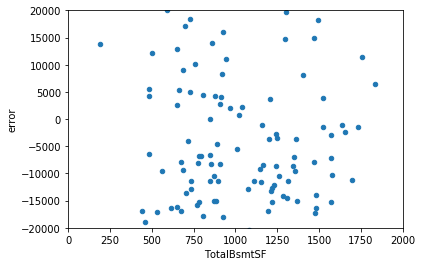

In [10]:
col = 'TotalBsmtSF'
linreg = LinearRegression()
linreg.fit(X_train[col].to_frame(), y_train)
print('Train set')
pred = linreg.predict(X_train[col].to_frame())
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set')
pred = linreg.predict(X_test[col].to_frame())
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))

X_test['error'] = X_test.SalePrice - pred
print('Error stats')
print(X_test['error'].describe())
X_test.plot.scatter(x=col, y='error', xlim=(0, 2000), ylim=(-20000, 20000))

The mean of the model errors in this case is 288, and when compared with the average house sale price (180921), it is very small. Therefore, although SalePrice is not completely explained by the linear relationship with TotalBsmtSF, a linear model for this variable and the outcome is not a bad idea.

#### 1stFlrSF

Train set
Linear Regression mse: 3827412644.4517813
Test set
Linear Regression mse: 4380212049.556352
Error stats
count       438.000000
mean        732.027656
std       66254.798523
min     -470783.611154
25%      -34069.301831
50%      -12065.539516
75%       32568.866387
max      405100.070469
Name: error, dtype: float64


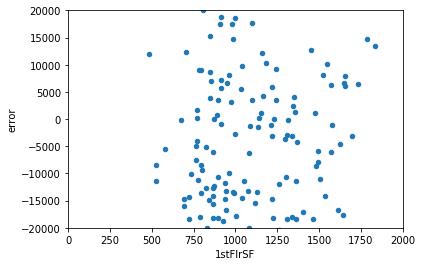

In [11]:
col = '1stFlrSF'
linreg = LinearRegression()
linreg.fit(X_train[col].to_frame(), y_train)
print('Train set')
pred = linreg.predict(X_train[col].to_frame())
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set')
pred = linreg.predict(X_test[col].to_frame())
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))

X_test['error'] = X_test.SalePrice - pred
print('Error stats')
print(X_test['error'].describe())
X_test.plot.scatter(x=col, y='error', xlim=(0, 2000), ylim=(-20000, 20000))

The model error of the linear model between this variable and the outcome is small compared to house price, and althogh it does not follow a normal distribution, it looks like a linear relationship between 1stFlrSF and Sale Price is not a bad idea.

#### GrLivArea

Train set
Linear Regression mse: 2891310084.4531326
Test set
Linear Regression mse: 3728458191.95017
Error stats
count       438.000000
mean       3551.401925
std       61027.443137
min     -471477.487422
25%      -25480.592702
50%        2207.422666
75%       25662.855977
max      338934.619568
Name: error, dtype: float64


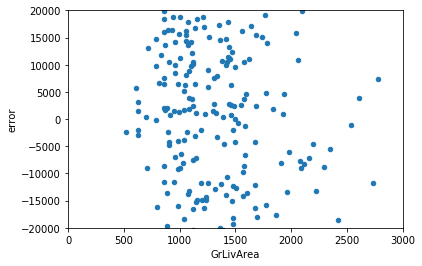

In [12]:
col =  'GrLivArea'
linreg = LinearRegression()
linreg.fit(X_train[col].to_frame(), y_train)
print('Train set')
pred = linreg.predict(X_train[col].to_frame())
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set')
pred = linreg.predict(X_test[col].to_frame())
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))

X_test['error'] = X_test.SalePrice - pred
print('Error stats')
print(X_test['error'].describe())
X_test.plot.scatter(x=col, y='error', xlim=(0, 3000), ylim=(-20000, 20000))

Analysis of the errors of the linear model between this variable and Sale Price does not follow a normal distribution centered at zero. Therefore, there is not a strictly linear relationship between GrLivArea and Sale Price.

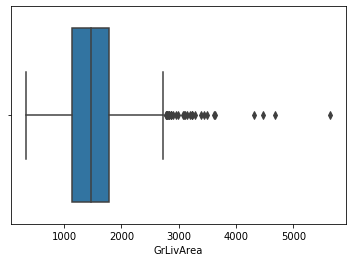

In [13]:
# let's look at the distribution of GrLivArea
import seaborn as sns
sns.boxplot('GrLivArea', data=data)

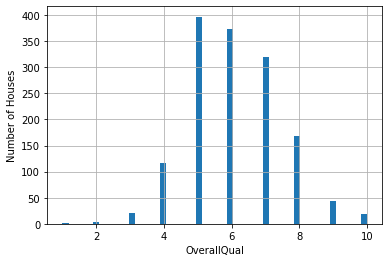

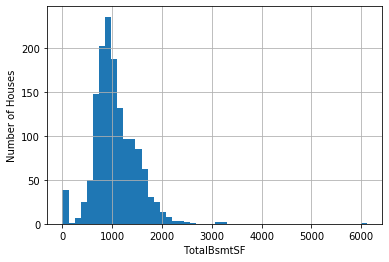

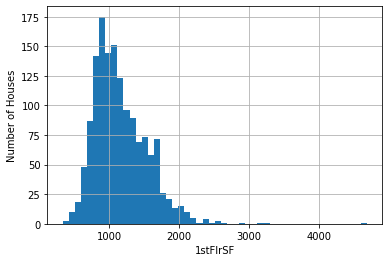

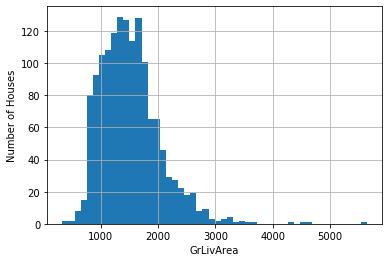

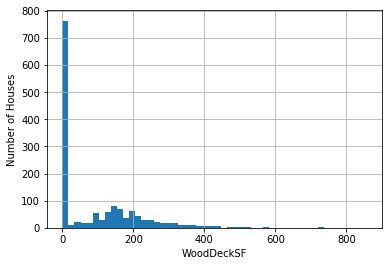

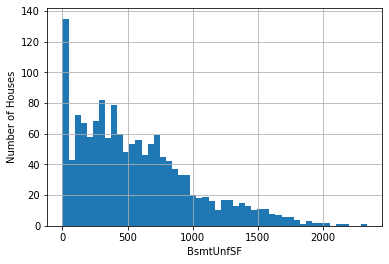

In [14]:
# let's look at the distributions of these variables

for var in cols_to_use[:-1]:
    fig = data[var].hist(bins=50)
    fig.set_xlabel(var)
    fig.set_ylabel('Number of Houses')
    plt.show()

The first 4 variables, which show a somewhat linear relationship with the target, show as well a somewhat Gaussian distribution. The fact that the distribution is not completely Gaussian, and the relationship not completely linear, ends in the distribution of the model errors seen in the previous notebook cells.

The last 2 variables deviate from the Gaussian distribution, which in turn may affect both linear relationship with target and error distribution. See below:

### WoodDeckSF

Train set
Linear Regression mse: 5543411222.505992
Test set
Linear Regression mse: 5901091788.125448
Error stats
count       438.000000
mean       1488.878480
std       76891.960561
min     -138437.194404
25%      -45903.032561
50%      -16564.068794
75%       31620.655162
max      550418.334283
Name: error, dtype: float64


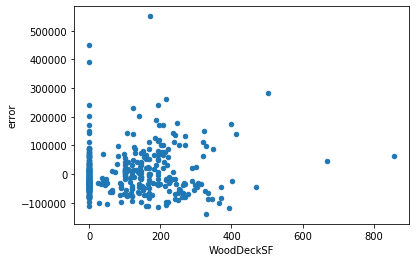

In [15]:
col = 'WoodDeckSF'
linreg = LinearRegression()
linreg.fit(X_train[col].to_frame(), y_train)
print('Train set')
pred = linreg.predict(X_train[col].to_frame())
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))
print('Test set')
pred = linreg.predict(X_test[col].to_frame())
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))

X_test['error'] = X_test.SalePrice - pred
print('Error stats')
print(X_test['error'].describe())
X_test.plot.scatter(x=col, y='error')

From this error plot, we can see that this variable is not linearly related to the Sale Price. Errors do not follow a normal distribution centered in zero.

### Let's compare the performance of some machine learning models on linear variables

In [16]:
# let's normalise the variables (this is necessary for linear regression as seen in previous lecture)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train[linear_vars+non_linear_vars])
X_test = scaler.transform(X_test[linear_vars+non_linear_vars])

In [17]:
# for each linear variable I build a linear regression, a support vector machine with a linear kernel and
# a random forest, and the idea is to compare the mean squared error on the test set.

for i in range(len(linear_vars)):
    print('variable: ', linear_vars[i])
    linreg = LinearRegression()
    linreg.fit(pd.Series(X_train[:,i]).to_frame(), y_train)
    print('Test set')
    pred = linreg.predict(pd.Series(X_test[:,i]).to_frame())
    print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
    print()

    rf = RandomForestRegressor(n_estimators=5, random_state=39, max_depth=2,min_samples_leaf=100)
    rf.fit(pd.Series(X_train[:,i]).to_frame(), y_train)
    print('Test set')
    pred = rf.predict(pd.Series(X_test[:,i]).to_frame())
    print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
    print()
    print()

variable:  OverallQual
Test set
Linear Regression mse: 2390257968.965773

Test set
Random Forests mse: 3103233518.4366794


variable:  TotalBsmtSF
Test set
Linear Regression mse: 4478167557.081897

Test set
Random Forests mse: 3977464855.683042


variable:  1stFlrSF
Test set
Linear Regression mse: 4380212049.556351

Test set
Random Forests mse: 4308458134.186173


variable:  GrLivArea
Test set
Linear Regression mse: 3728458191.95017

Test set
Random Forests mse: 3922595724.42011




For most of the "linearly related" variables, the linear regression model is at least as good, if not better, than the random forest at estimating the Sale Price. Compare the mse of the test sets for the three different models.

In [18]:
# for each non-linear variable I build a linear regression, a support vector machine with a linear kernel and
# a random forest, and the idea is to compare the mean squared error on the test set.

for i in [4,5]:
    print('variable: ', non_linear_vars[i-4])
    linreg = LinearRegression()
    linreg.fit(pd.Series(X_train[:,i]).to_frame(), y_train)
    print('Test set')
    pred = linreg.predict(pd.Series(X_test[:,i]).to_frame())
    print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
    print()


    rf = RandomForestRegressor(n_estimators=5, random_state=39, max_depth=2,min_samples_leaf=100)
    rf.fit(pd.Series(X_train[:,i]).to_frame(), y_train)
    print('Test set')
    pred = rf.predict(pd.Series(X_test[:,i]).to_frame())
    print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
    print()
    print()

variable:  WoodDeckSF
Test set
Linear Regression mse: 5901091788.125448

Test set
Random Forests mse: 5892571732.6786375


variable:  BsmtUnfSF
Test set
Linear Regression mse: 6406397443.391433

Test set
Random Forests mse: 6605256151.583271




Random Forests seem to be better for the first variable, and not too much of a difference for the second one.

### Mmachine learning model performance when built using variables "linearly" related to the Sale Price

In [19]:
linreg = LinearRegression()
linreg.fit(X_train[:,0:3], y_train)
print('Test set')
pred = linreg.predict(X_test[:,0:3])
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()

rf = RandomForestRegressor(n_estimators=5, random_state=39, max_depth=2,min_samples_leaf=100)
rf.fit(X_train[:,0:3], y_train)
print('Test set')
pred = rf.predict(X_test[:,0:3])
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
print()


Test set
Linear Regression mse: 2253814462.347893

Test set
Random Forests mse: 2654038031.5467834



Linear machine learning algorithms make betters predictions than random forests when trained on variables that show a somewhat linear relationship to the outcome, in this case, Sale Price.

### Machine learning models performance when using variables not "linearly" related to Sale Price

In [20]:
linreg = LinearRegression()
linreg.fit(X_train[:,4:5], y_train)
print('Test set')
pred = linreg.predict(X_test[:,4:5])
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, pred)))
print()


rf = RandomForestRegressor(n_estimators=5, random_state=39, max_depth=2,min_samples_leaf=100)
rf.fit(X_train[:,4:5], y_train)
print('Test set')
pred = rf.predict(X_test[:,4:5])
print('Random Forests mse: {}'.format(mean_squared_error(y_test, pred)))
print()
print()

Test set
Linear Regression mse: 5901091788.125448

Test set
Random Forests mse: 5892571732.6786375




However, when building a model using non-linear variables, alternative models like Random Forests may make better predictions. This is however, to be interpreted with caution, because Random Forests are good at predicting the Sale Price within the ranges of prices observed in the training dataset, but will not do a great job at inferring prices above or below the ranges on the training set.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**